In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly

In [ ]:
d1=pd.read_csv('/content/drive/MyDrive/2021VAERSData.csv',encoding='ISO-8859-1')
d1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7,12,15,23) have mixed types.Specify dtype option on import or set low_memory=False.



,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,PVT,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/23/2020,12/23/2020,0.0,none,WRK,NaN,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/22/2020,12/29/2020,7.0,NaN,PUB,NaN,Na,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710579,1919868,12/03/2021,TN,83.0,83.0,NaN,F,NaN,"sxs: weakness, malaise, anorexia time: 2 days ...",NaN,NaN,NaN,NaN,Y,1.0,NaN,NaN,U,12/01/2021,12/02/2021,1.0,"cbc, cmp, ua, cxr - 12-3-21",PVT,NaN,"aspirin, detrol, lisinopril, hctz, metoprolol ...",uti,"htn, tia, hld, urinary incontinence, hypothyro...",6-3-21,NaN,2,12/03/2021,NaN,NaN,Y,nkda
710580,1919876,12/03/2021,MI,75.0,75.0,NaN,F,NaN,Patient discharged from (8) day inpatient admi...,NaN,NaN,NaN,NaN,Y,8.0,NaN,NaN,N,02/12/2021,11/26/2021,287.0,NaN,UNK,NaN,acetaminophen (TYLENOL) 325 MG tablet apixaban...,NaN,Respiratory OSA (obstructive sleep apnea) Dysp...,NaN,NaN,2,12/03/2021,NaN,NaN,Y,Betadine [Povidone Iodine]Rash
710581,1919878,12/03/2021,VA,82.0,82.0,NaN,M,NaN,PATIENT SUFFERED A STROKE SOMETIME THE NIGHT O...,Y,12/02/2021,NaN,NaN,NaN,NaN,NaN,NaN,N,11/26/2021,11/29/2021,3.0,UNKNOWN,PVT,NaN,DILTIAZEM CD 240MG PO DAILY; LEVOTHYROXINE 25M...,PATIENT HAD SWELLING IN LOWER EXTREMETIES AND ...,HYPOTHYROIDISM; CARDIAC ISSUES,NaN,NaN,2,12/03/2021,NaN,NaN,NaN,NKDA
710582,1919904,12/03/2021,NJ,20.0,20.0,NaN,M,NaN,"Is chest pain, exhaustion, fluttering in the h...",NaN,NaN,Y,NaN,Y,7.0,NaN,NaN,U,10/01/2021,10/12/2021,11.0,"EKG, echo,",MIL,NaN,None,None,None,NaN,NaN,2,12/03/2021,NaN,NaN,Y,Some fruits


In [ ]:
d2=pd.read_csv('/content/drive/MyDrive/2021VAERSSYMPTOMS.csv')
d2

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
949855,1919948,Rash,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
949856,1919953,Incorrect route of product administration,24.1,No adverse event,24.1,NaN,NaN,NaN,NaN,NaN,NaN
949857,1919957,Rash,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
949858,1919962,COVID-19,24.1,Chest X-ray normal,24.1,SARS-CoV-2 test positive,24.1,NaN,NaN,NaN,NaN


In [ ]:
d2.isnull().sum()

VAERS_ID                0
SYMPTOM1                0
SYMPTOMVERSION1         0
SYMPTOM2           212027
SYMPTOMVERSION2    212027
SYMPTOM3           383516
SYMPTOMVERSION3    383516
SYMPTOM4           519367
SYMPTOMVERSION4    519367
SYMPTOM5           627895
SYMPTOMVERSION5    627895
dtype: int64

In [ ]:
d3=pd.read_csv('/content/drive/MyDrive/2021VAERSVAX.csv',encoding='ISO-8859-1')
d3

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))
...,...,...,...,...,...,...,...,...
750550,1919957,DTAPIPV,GLAXOSMITHKLINE BIOLOGICALS,H9FM5,1,IM,RL,DTAP + IPV (KINRIX)
750551,1919957,MMR,MERCK & CO. INC.,T020655,2,SC,RL,MEASLES + MUMPS + RUBELLA (MMR II)
750552,1919957,VARCEL,MERCK & CO. INC.,U010396,2,SC,RL,VARICELLA (VARIVAX)
750553,1919962,COVID19,PFIZER\BIONTECH,FH8028,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))


In [ ]:
d12=d1[['VAERS_ID','DIED']]
d12

,VAERS_ID,DIED
0,916600,NaN
1,916601,NaN
2,916602,NaN
3,916603,NaN
4,916604,NaN
...,...,...
710579,1919868,NaN
710580,1919876,NaN
710581,1919878,Y
710582,1919904,NaN


In [ ]:
d12.isnull().sum()

VAERS_ID         0
DIED        701167
dtype: int64

In [ ]:
d32=d3[['VAERS_ID','VAX_TYPE','VAX_NAME','VAX_MANU']]
d32

,VAERS_ID,VAX_TYPE,VAX_NAME,VAX_MANU
0,916600,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1,916601,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
2,916602,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH
3,916603,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
4,916604,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
...,...,...,...,...
750550,1919957,DTAPIPV,DTAP + IPV (KINRIX),GLAXOSMITHKLINE BIOLOGICALS
750551,1919957,MMR,MEASLES + MUMPS + RUBELLA (MMR II),MERCK & CO. INC.
750552,1919957,VARCEL,VARICELLA (VARIVAX),MERCK & CO. INC.
750553,1919962,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH


In [ ]:
d4=pd.merge(d12,d32,on='VAERS_ID')
d4

,VAERS_ID,DIED,VAX_TYPE,VAX_NAME,VAX_MANU
0,916600,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1,916601,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
2,916602,NaN,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH
3,916603,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
4,916604,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
...,...,...,...,...,...
750550,1919868,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
750551,1919876,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
750552,1919878,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
750553,1919904,NaN,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH


In [ ]:
d4.isnull().sum()

VAERS_ID         0
DIED        739562
VAX_TYPE         0
VAX_NAME         0
VAX_MANU         0
dtype: int64

In [ ]:
d4c=d4.query('DIED==["Y"]')


In [ ]:
d4c

,VAERS_ID,DIED,VAX_TYPE,VAX_NAME,VAX_MANU
201,916803,Y,FLU4,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE QUADRI...,SANOFI PASTEUR
512,917117,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1314,917790,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1317,917793,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1586,918065,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
...,...,...,...,...,...
750430,1919665,Y,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH
750443,1919678,Y,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH
750520,1919838,Y,COVID19,COVID19 (COVID19 (JANSSEN)),JANSSEN
750552,1919878,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA


In [ ]:
dc4=d4c.query('VAX_TYPE==["COVID19"]')

In [ ]:
dc4

,VAERS_ID,DIED,VAX_TYPE,VAX_NAME,VAX_MANU
512,917117,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1314,917790,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1317,917793,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1586,918065,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1882,918388,Y,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH
...,...,...,...,...,...
750430,1919665,Y,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH
750443,1919678,Y,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH
750520,1919838,Y,COVID19,COVID19 (COVID19 (JANSSEN)),JANSSEN
750552,1919878,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA


In [ ]:
len(d4c[d4c['VAX_NAME'].isin(['COVID19 (COVID19 (MODERNA))'])])

4385

In [ ]:
len(d4.query('VAX_TYPE==["COVID19"]').VAX_NAME.isin(['COVID19 (COVID19 (MODERNA))']))

699420

In [ ]:
d4.VAX_NAME.value_counts()

COVID19 (COVID19 (MODERNA))              323751
COVID19 (COVID19 (PFIZER-BIONTECH))      312974
COVID19 (COVID19 (JANSSEN))               61149
ZOSTER (SHINGRIX)                          9597
VACCINE NOT SPECIFIED (NO BRAND NAME)      8619
                                          ...  
INFLUENZA (SEASONAL) (FLUENZ TETRA)           1
INFLUENZA (SEASONAL) (FLUENZ)                 1
MUMPS (NO BRAND NAME)                         1
DIPHTHERIA TOXOIDS (NO BRAND NAME)            1
PERTUSSIS (NO BRAND NAME)                     1
Name: VAX_NAME, Length: 134, dtype: int64

In [ ]:
a=d4.query('VAX_TYPE==["COVID19"]').VAX_NAME.value_counts()

In [ ]:
b=dc4.VAX_NAME.value_counts()

In [ ]:
a

COVID19 (COVID19 (MODERNA))            323751
COVID19 (COVID19 (PFIZER-BIONTECH))    312974
COVID19 (COVID19 (JANSSEN))             61149
COVID19 (COVID19 (UNKNOWN))              1546
Name: VAX_NAME, dtype: int64

In [ ]:
b

COVID19 (COVID19 (PFIZER-BIONTECH))    5110
COVID19 (COVID19 (MODERNA))            4385
COVID19 (COVID19 (JANSSEN))            1065
COVID19 (COVID19 (UNKNOWN))              40
Name: VAX_NAME, dtype: int64

In [ ]:
list1=[[323751,4385], [312974,5110], [61149,1065],[1546,40]]
index1 = ["moderna", "pfizer", "janssen","unknown"]
columns1 =["接種数", "死亡数"]
ds=pd.DataFrame(data=list1, index=index1, columns=columns1)

In [ ]:
ds

,接種数,死亡数
moderna,323751,4385
pfizer,312974,5110
janssen,61149,1065
unknown,1546,40


In [ ]:
ds['死亡率']=ds['死亡数']/ds['接種数']

In [ ]:
ds

,接種数,死亡数,死亡率
moderna,323751,4385,0.013544
pfizer,312974,5110,0.016327
janssen,61149,1065,0.017416
unknown,1546,40,0.025873


In [ ]:
d41=d4.query('VAX_TYPE==["COVID19"]')
d41

,VAERS_ID,DIED,VAX_TYPE,VAX_NAME,VAX_MANU
0,916600,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1,916601,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
2,916602,NaN,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH
3,916603,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
4,916604,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
...,...,...,...,...,...
750550,1919868,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
750551,1919876,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
750552,1919878,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
750553,1919904,NaN,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH


In [ ]:
d4ct = pd.crosstab(d41['VAX_NAME'], d41['DIED'])
d4ct

DIED,Y
VAX_NAME,
COVID19 (COVID19 (JANSSEN)),1065
COVID19 (COVID19 (MODERNA)),4385
COVID19 (COVID19 (PFIZER-BIONTECH)),5110
COVID19 (COVID19 (UNKNOWN)),40


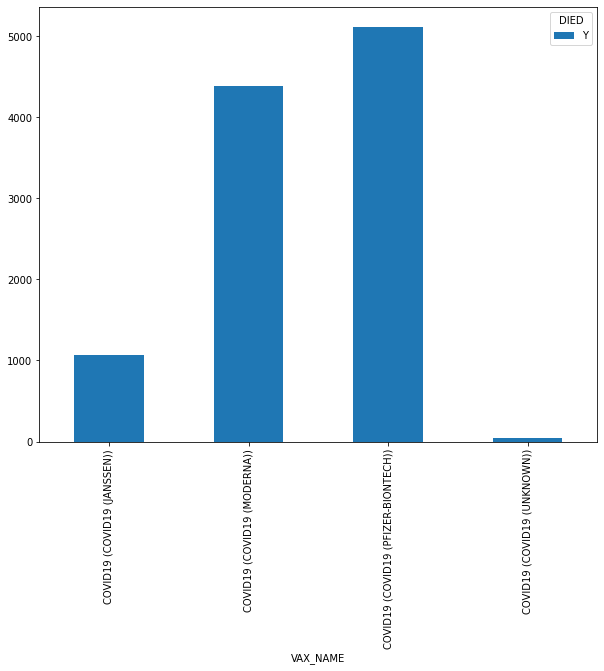

In [ ]:
d4ct.plot.bar(stacked=True, figsize=(10, 8))

In [ ]:
d13=d1[['VAERS_ID','DIED','SEX','AGE_YRS']]
d13

,VAERS_ID,DIED,SEX,AGE_YRS
0,916600,NaN,F,33.0
1,916601,NaN,F,73.0
2,916602,NaN,F,23.0
3,916603,NaN,F,58.0
4,916604,NaN,F,47.0
...,...,...,...,...
710579,1919868,NaN,F,83.0
710580,1919876,NaN,F,75.0
710581,1919878,Y,M,82.0
710582,1919904,NaN,M,20.0


In [ ]:
d43=pd.merge(d13,d32,on='VAERS_ID')
d43

,VAERS_ID,DIED,SEX,AGE_YRS,VAX_TYPE,VAX_NAME,VAX_MANU
0,916600,NaN,F,33.0,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1,916601,NaN,F,73.0,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
2,916602,NaN,F,23.0,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH
3,916603,NaN,F,58.0,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
4,916604,NaN,F,47.0,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
...,...,...,...,...,...,...,...
750550,1919868,NaN,F,83.0,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
750551,1919876,NaN,F,75.0,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
750552,1919878,Y,M,82.0,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
750553,1919904,NaN,M,20.0,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH


In [ ]:
d43=d43.query('VAX_TYPE==["COVID19"]')
d43=d43.query('DIED	==["Y"]')
d43

,VAERS_ID,DIED,SEX,AGE_YRS,VAX_TYPE,VAX_NAME,VAX_MANU
512,917117,Y,M,82.0,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1314,917790,Y,F,90.0,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1317,917793,Y,F,78.0,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1586,918065,Y,M,64.0,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1882,918388,Y,F,65.0,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH
...,...,...,...,...,...,...,...
750430,1919665,Y,F,57.0,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH
750443,1919678,Y,M,NaN,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH
750520,1919838,Y,F,NaN,COVID19,COVID19 (COVID19 (JANSSEN)),JANSSEN
750552,1919878,Y,M,82.0,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA


In [ ]:
d43.isnull().sum()

VAERS_ID      0
DIED          0
SEX           0
AGE_YRS     925
VAX_TYPE      0
VAX_NAME      0
VAX_MANU      0
dtype: int64

In [ ]:
d44=d43[['SEX','AGE_YRS','VAX_MANU']]
d44

,SEX,AGE_YRS,VAX_MANU
512,M,82.0,MODERNA
1314,F,90.0,MODERNA
1317,F,78.0,MODERNA
1586,M,64.0,MODERNA
1882,F,65.0,PFIZER\BIONTECH
...,...,...,...
750430,F,57.0,PFIZER\BIONTECH
750443,M,NaN,PFIZER\BIONTECH
750520,F,NaN,JANSSEN
750552,M,82.0,MODERNA


In [ ]:
d44.dropna(how='any')

,SEX,AGE_YRS,VAX_MANU
512,M,82.0,MODERNA
1314,F,90.0,MODERNA
1317,F,78.0,MODERNA
1586,M,64.0,MODERNA
1882,F,65.0,PFIZER\BIONTECH
...,...,...,...
750012,M,98.0,MODERNA
750071,F,24.0,JANSSEN
750407,M,91.0,PFIZER\BIONTECH
750430,F,57.0,PFIZER\BIONTECH


In [ ]:
d4m=d44.query('VAX_MANU	==["MODERNA"]')[['SEX','AGE_YRS']]
d4m

,SEX,AGE_YRS
512,M,82.0
1314,F,90.0
1317,F,78.0
1586,M,64.0
1965,M,94.0
...,...,...
749634,M,68.0
749755,F,66.0
750012,M,98.0
750552,M,82.0


In [ ]:
d4p=d44.query('VAX_MANU	==["PFIZER\BIONTECH"]')[['SEX','AGE_YRS']]
d4j=d44.query('VAX_MANU	==["JANSSEN"]')[['SEX','AGE_YRS']]

In [ ]:
d4mm=d4m.query('SEX	==["M"]')[['AGE_YRS']]
d4mm

,AGE_YRS
512,82.0
1586,64.0
1965,94.0
4821,65.0
4846,87.0
...,...
749216,76.0
749633,68.0
749634,68.0
750012,98.0


In [ ]:
d4mf=d4m.query('SEX	==["F"]')[['AGE_YRS']]
d4pm=d4p.query('SEX	==["M"]')[['AGE_YRS']]
d4pf=d4p.query('SEX	==["F"]')[['AGE_YRS']]
d4jm=d4m.query('SEX	==["M"]')[['AGE_YRS']]
d4jf=d4j.query('SEX	==["M"]')[['AGE_YRS']]


In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



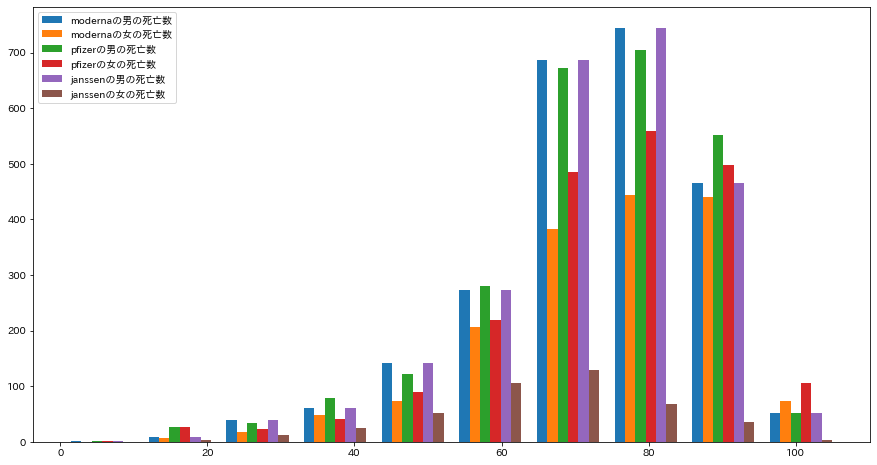

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.hist([d4mm['AGE_YRS'], d4mf['AGE_YRS'],d4pm['AGE_YRS'],d4pf['AGE_YRS'],d4jm['AGE_YRS'],d4jf['AGE_YRS']], label=['modernaの男の死亡数', 'modernaの女の死亡数','pfizerの男の死亡数','pfizerの女の死亡数','janssenの男の死亡数','janssenの女の死亡数'])
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



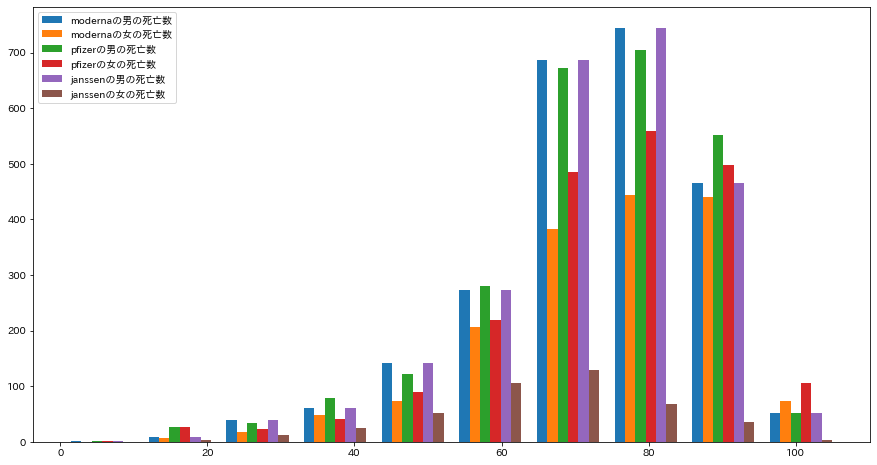

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.hist([d4mm['AGE_YRS'], d4mf['AGE_YRS'],d4pm['AGE_YRS'],d4pf['AGE_YRS'],d4jm['AGE_YRS'],d4jf['AGE_YRS']], label=['modernaの男の死亡数', 'modernaの女の死亡数','pfizerの男の死亡数','pfizerの女の死亡数','janssenの男の死亡数','janssenの女の死亡数'])
plt.legend(loc='upper left')
plt.show()

全体的には男性は女性より死ぬ数が多いことが分かる。女性はmodernaあるいはjanssenを選択した方がいい。グラフから女性はあまりjanssenを接種しないことがわかった。男性は年齢別で選んであとは神様に祈るしかない。全体的には年寄りの方が死ぬ数多い。コロナが年寄りを殺すのが得意のははある程度ワクチンで証明されると思う。

In [ ]:
d51=d1[['VAERS_ID','AGE_YRS','SEX','DIED']]
d52=d2[['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]
d53=d3[['VAERS_ID','VAX_TYPE','VAX_NAME','VAX_MANU']]
dm1=pd.merge(d51,d53,on='VAERS_ID')
dm1

,VAERS_ID,AGE_YRS,SEX,DIED,VAX_TYPE,VAX_NAME,VAX_MANU
0,916600,33.0,F,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
1,916601,73.0,F,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
2,916602,23.0,F,NaN,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH
3,916603,58.0,F,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
4,916604,47.0,F,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
...,...,...,...,...,...,...,...
750550,1919868,83.0,F,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
750551,1919876,75.0,F,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
750552,1919878,82.0,M,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA
750553,1919904,20.0,M,NaN,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH


In [ ]:
dm2=pd.merge(dm1,d52,on='VAERS_ID')
dm2

,VAERS_ID,AGE_YRS,SEX,DIED,VAX_TYPE,VAX_NAME,VAX_MANU,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916600,33.0,F,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Dysphagia,Epiglottitis,NaN,NaN,NaN
1,916601,73.0,F,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Anxiety,Dyspnoea,NaN,NaN,NaN
2,916602,23.0,F,NaN,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN
3,916603,58.0,F,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Dizziness,Fatigue,Mobility decreased,NaN,NaN
4,916604,47.0,F,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1009762,1919878,82.0,M,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Cerebrovascular accident,Death,NaN,NaN,NaN
1009763,1919904,20.0,M,NaN,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH,Cardiac flutter,Chest pain,Echocardiogram,Ejection fraction decreased,Electrocardiogram
1009764,1919904,20.0,M,NaN,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH,Fatigue,Loss of consciousness,Myocarditis,NaN,NaN
1009765,1919911,NaN,F,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Cognitive disorder,Dizziness,Fatigue,Hypersomnia,Indifference


In [ ]:
dm2=dm2.query('VAX_TYPE==["COVID19"]')
dm2

,VAERS_ID,AGE_YRS,SEX,DIED,VAX_TYPE,VAX_NAME,VAX_MANU,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916600,33.0,F,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Dysphagia,Epiglottitis,NaN,NaN,NaN
1,916601,73.0,F,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Anxiety,Dyspnoea,NaN,NaN,NaN
2,916602,23.0,F,NaN,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN
3,916603,58.0,F,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Dizziness,Fatigue,Mobility decreased,NaN,NaN
4,916604,47.0,F,NaN,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1009762,1919878,82.0,M,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Cerebrovascular accident,Death,NaN,NaN,NaN
1009763,1919904,20.0,M,NaN,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH,Cardiac flutter,Chest pain,Echocardiogram,Ejection fraction decreased,Electrocardiogram
1009764,1919904,20.0,M,NaN,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH,Fatigue,Loss of consciousness,Myocarditis,NaN,NaN
1009765,1919911,NaN,F,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Cognitive disorder,Dizziness,Fatigue,Hypersomnia,Indifference


In [ ]:
dm2s1=dm2[['VAX_MANU','SEX','AGE_YRS','SYMPTOM1']]
dm2s1

,VAX_MANU,SEX,AGE_YRS,SYMPTOM1
0,MODERNA,F,33.0,Dysphagia
1,MODERNA,F,73.0,Anxiety
2,PFIZER\BIONTECH,F,23.0,Chest discomfort
3,MODERNA,F,58.0,Dizziness
4,MODERNA,F,47.0,Injection site erythema
...,...,...,...,...
1009762,MODERNA,M,82.0,Cerebrovascular accident
1009763,PFIZER\BIONTECH,M,20.0,Cardiac flutter
1009764,PFIZER\BIONTECH,M,20.0,Fatigue
1009765,MODERNA,F,NaN,Cognitive disorder


In [ ]:
dm2['SYMPTOM1'].value_counts().head(16)

Chills                          50127
Arthralgia                      37264
Dizziness                       30802
Fatigue                         25892
COVID-19                        25600
Headache                        23992
Asthenia                        21024
Pyrexia                         19170
Injection site erythema         16644
Pain                            14559
Pain in extremity               14451
Erythema                        13161
Nausea                          11670
Rash                            11092
Expired product administered    10157
Dyspnoea                         8921
Name: SYMPTOM1, dtype: int64

##五つの症状があるので　それぞれをみてみる　まずは死ぬかどうかに関わらずグラフを出してみる

#症状について　数が一万位以上のものを選ぶ

In [ ]:
dm11=dm2[['VAX_MANU','SYMPTOM1']]
dm11

,VAX_MANU,SYMPTOM1
0,MODERNA,Dysphagia
1,MODERNA,Anxiety
2,PFIZER\BIONTECH,Chest discomfort
3,MODERNA,Dizziness
4,MODERNA,Injection site erythema
...,...,...
1009762,MODERNA,Cerebrovascular accident
1009763,PFIZER\BIONTECH,Cardiac flutter
1009764,PFIZER\BIONTECH,Fatigue
1009765,MODERNA,Cognitive disorder


In [ ]:
dm12=dm11.query('SYMPTOM1 in ["Chills", "Arthralgia","Dizziness","Fatigue","COVID-19","Headache ","Asthenia","Pyrexia","Injection site erythema","Pain","Pain in extremity","Erythema","Nausea","Rash","Expired product administered"]')

In [ ]:
dm13=pd.crosstab(dm12['SYMPTOM1'],dm12['VAX_MANU'])
dm13

VAX_MANU,JANSSEN,MODERNA,PFIZER\BIONTECH,UNKNOWN MANUFACTURER
SYMPTOM1,,,,
Arthralgia,3142,17147,16898,77
Asthenia,2215,9817,8938,54
COVID-19,1786,8516,15231,67
Chills,6524,25522,17948,133
Dizziness,3565,11369,15814,54
Erythema,392,9389,3362,18
Expired product administered,797,7342,2007,11
Fatigue,2554,12228,11059,51
Injection site erythema,238,14677,1720,9


In [ ]:
data = [
    plotly.graph_objs.Bar(x=dm13.index, y=dm13['JANSSEN'], name='JANSSEN'),
    plotly.graph_objs.Bar(x=dm13.index, y=dm13['MODERNA'], name='MODERNA'),
    plotly.graph_objs.Bar(x=dm13.index, y=dm13['PFIZER\BIONTECH'], name='PFIZER'),
    ]
layout = plotly.graph_objs.Layout(
    title='症状のグラフ',
    xaxis={'title':'症状（英語）'}, 
    yaxis={'title':'数', 'rangemode':'tozero'}, #starts from zero
)
fig = plotly.graph_objs.Figure(data=data, layout=layout)
fig.show()

一番目の症状について、どの会社のワクチンも症状はchillsつまり寒いと感じることの場合が一番多かった。

In [ ]:
dm2['SYMPTOM2'].value_counts().head(15)

Headache                    35060
Fatigue                     33016
Chills                      25900
Dizziness                   19781
Pyrexia                     19147
Pain                        18151
Pain in extremity           15313
Nausea                      14357
SARS-CoV-2 test positive    11742
Dyspnoea                    11682
Injection site pain         11135
Rash                         9349
Pruritus                     8822
Myalgia                      8820
Diarrhoea                    7515
Name: SYMPTOM2, dtype: int64

In [ ]:
dm14=dm2[['VAX_MANU','SYMPTOM2']]
dm14=dm14.query('SYMPTOM2 in ["Chills","Dizziness","Fatigue","COVID-19","Headache ","Pyrexia","Injection site pain  ","Pain","Pain in extremity","Nausea","SARS-CoV-2 test positive"]')
dm14=pd.crosstab(dm14['SYMPTOM2'],dm14['VAX_MANU'])
data = [
    plotly.graph_objs.Bar(x=dm14.index, y=dm14['JANSSEN'], name='JANSSEN'),
    plotly.graph_objs.Bar(x=dm14.index, y=dm14['MODERNA'], name='MODERNA'),
    plotly.graph_objs.Bar(x=dm14.index, y=dm14['PFIZER\BIONTECH'], name='PFIZER'),
    ]
layout = plotly.graph_objs.Layout(
    title='症状のグラフ',
    xaxis={'title':'症状（英語）'}, 
    yaxis={'title':'数', 'rangemode':'tozero'}, #starts from zero
)
fig = plotly.graph_objs.Figure(data=data, layout=layout)
fig.show()

In [ ]:
dm2['SYMPTOM3'].value_counts().head(15)

Headache                   31074
Fatigue                    23443
Pyrexia                    21776
Pain                       20740
Nausea                     16114
Pain in extremity          14198
Dizziness                  10735
Myalgia                     9830
Dyspnoea                    9493
Injection site pain         8961
Chills                      8784
Rash                        7027
Injection site swelling     7017
Pruritus                    6945
Hyperhidrosis               5787
Name: SYMPTOM3, dtype: int64

In [ ]:
dm15=dm2[['VAX_MANU','SYMPTOM3']]
dm15=dm15.query('SYMPTOM3 in ["Chills","Dizziness","Fatigue","COVID-19","Headache ","Pyrexia","Injection site pain  ","Pain","Pain in extremity","Nausea","Myalgia","Dyspnoea"]')
dm15=pd.crosstab(dm15['SYMPTOM3'],dm15['VAX_MANU'])
data = [
    plotly.graph_objs.Bar(x=dm15.index, y=dm15['JANSSEN'], name='JANSSEN'),
    plotly.graph_objs.Bar(x=dm15.index, y=dm15['MODERNA'], name='MODERNA'),
    plotly.graph_objs.Bar(x=dm15.index, y=dm15['PFIZER\BIONTECH'], name='PFIZER'),
    ]
layout = plotly.graph_objs.Layout(
    title='症状のグラフ',
    xaxis={'title':'症状（英語）'}, 
    yaxis={'title':'数', 'rangemode':'tozero'}, #starts from zero
)
fig = plotly.graph_objs.Figure(data=data, layout=layout)
fig.show()

In [ ]:
dm2['SYMPTOM4'].value_counts().head(15)

Pyrexia                    23355
Headache                   20544
Pain                       19467
Nausea                     15162
Fatigue                    13248
Pain in extremity          12486
Myalgia                     9122
Injection site pain         6276
Dyspnoea                    6240
Vomiting                    5630
Dizziness                   5551
Injection site swelling     5323
Rash                        5230
Pruritus                    4858
Hyperhidrosis               4404
Name: SYMPTOM4, dtype: int64

In [ ]:
dm16=dm2[['VAX_MANU','SYMPTOM4']]
dm16=dm16.query('SYMPTOM4 in ["Chills","Dizziness","Fatigue","COVID-19","Headache ","Pyrexia","Injection site pain  ","Pain","Pain in extremity","Nausea","Myalgia","Dyspnoea"]')
dm16=pd.crosstab(dm16['SYMPTOM4'],dm16['VAX_MANU'])
data = [
    plotly.graph_objs.Bar(x=dm16.index, y=dm16['JANSSEN'], name='JANSSEN'),
    plotly.graph_objs.Bar(x=dm16.index, y=dm16['MODERNA'], name='MODERNA'),
    plotly.graph_objs.Bar(x=dm16.index, y=dm16['PFIZER\BIONTECH'], name='PFIZER'),
    ]
layout = plotly.graph_objs.Layout(
    title='症状のグラフ',
    xaxis={'title':'症状（英語）'}, 
    yaxis={'title':'数', 'rangemode':'tozero'}, #starts from zero
)
fig = plotly.graph_objs.Figure(data=data, layout=layout)
fig.show()

In [ ]:
dm2['SYMPTOM5'].value_counts().head(15)

Pyrexia                    21225
Pain                       15490
Headache                   11872
Nausea                     11785
Pain in extremity          10149
Fatigue                     7375
Myalgia                     7236
Vomiting                    5403
Dyspnoea                    4051
Injection site pain         4002
Rash                        3713
Paraesthesia                3359
Malaise                     3300
Pruritus                    3278
Injection site swelling     3047
Name: SYMPTOM5, dtype: int64

In [ ]:
dm17=dm2[['VAX_MANU','SYMPTOM5']]
dm17=dm17.query('SYMPTOM5 in ["Fatigue","Headache ","Pyrexia","Injection site pain  ","Pain","Pain in extremity","Nausea","Myalgia","Dyspnoea"]')
dm17=pd.crosstab(dm17['SYMPTOM5'],dm17['VAX_MANU'])
data = [
    plotly.graph_objs.Bar(x=dm17.index, y=dm17['JANSSEN'], name='JANSSEN'),
    plotly.graph_objs.Bar(x=dm17.index, y=dm17['MODERNA'], name='MODERNA'),
    plotly.graph_objs.Bar(x=dm17.index, y=dm17['PFIZER\BIONTECH'], name='PFIZER'),
    ]
layout = plotly.graph_objs.Layout(
    title='症状のグラフ',
    xaxis={'title':'症状（英語）'}, 
    yaxis={'title':'数', 'rangemode':'tozero'}, #starts from zero
)
fig = plotly.graph_objs.Figure(data=data, layout=layout)
fig.show()


In [ ]:
dm3=dm2.query('DIED==["Y"]')
dm3

,VAERS_ID,AGE_YRS,SEX,DIED,VAX_TYPE,VAX_NAME,VAX_MANU,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
712,917117,82.0,M,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,COVID-19,Death,SARS-CoV-2 test positive,NaN,NaN
1780,917790,90.0,F,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,COVID-19,Death,Exposure to SARS-CoV-2,SARS-CoV-2 test positive,NaN
1783,917793,78.0,F,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,COVID-19,Death,SARS-CoV-2 test positive,NaN,NaN
2175,918065,64.0,M,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Death,Unresponsive to stimuli,NaN,NaN,NaN
2546,918388,65.0,F,Y,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH,Death,Pulse absent,Respiratory arrest,Resuscitation,Unresponsive to stimuli
...,...,...,...,...,...,...,...,...,...,...,...,...
1009607,1919678,NaN,M,Y,COVID19,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH,Cerebral haemorrhage,Thrombocytopenia,NaN,NaN,NaN
1009719,1919838,NaN,F,Y,COVID19,COVID19 (COVID19 (JANSSEN)),JANSSEN,Cerebrovascular accident,NaN,NaN,NaN,NaN
1009762,1919878,82.0,M,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Cerebrovascular accident,Death,NaN,NaN,NaN
1009765,1919911,NaN,F,Y,COVID19,COVID19 (COVID19 (MODERNA)),MODERNA,Cognitive disorder,Dizziness,Fatigue,Hypersomnia,Indifference


In [ ]:
dm3['SYMPTOM1'].value_counts().head(15)

Death                        3802
COVID-19                     1560
Acute kidney injury           391
Asthenia                      385
Acute respiratory failure     374
Cardiac arrest                370
SARS-CoV-2 test positive      291
Dyspnoea                      266
Autopsy                       217
Cerebrovascular accident      157
COVID-19 pneumonia            150
Abdominal pain                143
Condition aggravated          134
Endotracheal intubation       127
Pyrexia                       125
Name: SYMPTOM1, dtype: int64

In [ ]:
dm31=dm3[['VAX_MANU','SYMPTOM1']]
dm31=dm31.query('SYMPTOM1 in ["Death","COVID-19 ","Acute kidney injury","Asthenia","Acute respiratory failure","Cardiac arrest","SARS-CoV-2 test positive","Dyspnoea"]')
dm31=pd.crosstab(dm31['SYMPTOM1'],dm31['VAX_MANU'])
data = [
    plotly.graph_objs.Bar(x=dm31.index, y=dm31['JANSSEN'], name='JANSSEN'),
    plotly.graph_objs.Bar(x=dm31.index, y=dm31['MODERNA'], name='MODERNA'),
    plotly.graph_objs.Bar(x=dm31.index, y=dm31['PFIZER\BIONTECH'], name='PFIZER'),
    ]
layout = plotly.graph_objs.Layout(
    title='症状のグラフ',
    xaxis={'title':'症状（英語）'}, 
    yaxis={'title':'数', 'rangemode':'tozero'}, #starts from zero
)
fig = plotly.graph_objs.Figure(data=data, layout=layout)
fig.show()


In [ ]:
dm3['SYMPTOM2'].value_counts().head(15)

Death                       2437
COVID-19                     474
Dyspnoea                     381
SARS-CoV-2 test positive     338
COVID-19 pneumonia           233
Cardiac arrest               191
Asthenia                     184
Condition aggravated         175
Cough                        174
Endotracheal intubation      141
Pyrexia                      134
Malaise                      130
Fatigue                      122
Pneumonia                    119
Resuscitation                114
Name: SYMPTOM2, dtype: int64

In [ ]:
dm32=dm3[['VAX_MANU','SYMPTOM2']]
dm32=dm32.query('SYMPTOM2 in ["Death","COVID-19","COVID-19 pneumonia","Asthenia","Condition aggravated ","Cardiac arrest","SARS-CoV-2 test positive","Dyspnoea"]')
dm32=pd.crosstab(dm32['SYMPTOM2'],dm32['VAX_MANU'])
data = [
    plotly.graph_objs.Bar(x=dm32.index, y=dm32['JANSSEN'], name='JANSSEN'),
    plotly.graph_objs.Bar(x=dm32.index, y=dm32['MODERNA'], name='MODERNA'),
    plotly.graph_objs.Bar(x=dm32.index, y=dm32['PFIZER\BIONTECH'], name='PFIZER'),
    ]
layout = plotly.graph_objs.Layout(
    title='症状のグラフ',
    xaxis={'title':'症状（英語）'}, 
    yaxis={'title':'数', 'rangemode':'tozero'}, #starts from zero
)
fig = plotly.graph_objs.Figure(data=data, layout=layout)
fig.show()

In [ ]:
dm3['SYMPTOM3'].value_counts().head(15)

Death                                    1055
SARS-CoV-2 test positive                  583
Dyspnoea                                  413
COVID-19                                  293
Cough                                     185
Fatigue                                   179
Pyrexia                                   168
COVID-19 pneumonia                        151
Intensive care                            129
Endotracheal intubation                   128
Pneumonia                                 125
Malaise                                   122
Unresponsive to stimuli                   118
Hypoxia                                   108
General physical health deterioration     108
Name: SYMPTOM3, dtype: int64

In [ ]:
dm33=dm3[['VAX_MANU','SYMPTOM3']]
dm33=dm33.query('SYMPTOM3 in ["Death","COVID-19","COVID-19 pneumonia","Cough","Pyrexia","Cardiac arrest","SARS-CoV-2 test positive","Dyspnoea"]')
dm33=pd.crosstab(dm33['SYMPTOM3'],dm33['VAX_MANU'])
data = [
    plotly.graph_objs.Bar(x=dm33.index, y=dm33['JANSSEN'], name='JANSSEN'),
    plotly.graph_objs.Bar(x=dm33.index, y=dm33['MODERNA'], name='MODERNA'),
    plotly.graph_objs.Bar(x=dm33.index, y=dm33['PFIZER\BIONTECH'], name='PFIZER'),
    ]
layout = plotly.graph_objs.Layout(
    title='症状のグラフ',
    xaxis={'title':'症状（英語）'}, 
    yaxis={'title':'数', 'rangemode':'tozero'}, #starts from zero
)
fig = plotly.graph_objs.Figure(data=data, layout=layout)
fig.show()

In [ ]:
dm3['SYMPTOM4'].value_counts().head(15)

Death                       709
SARS-CoV-2 test positive    420
Dyspnoea                    326
Endotracheal intubation     173
Pyrexia                     140
Fatigue                     139
Cough                       129
Unresponsive to stimuli     127
Hypoxia                     122
Pneumonia                   117
Intensive care              115
COVID-19                    115
COVID-19 pneumonia          110
Resuscitation               107
Condition aggravated         97
Name: SYMPTOM4, dtype: int64

In [ ]:
dm34=dm3[['VAX_MANU','SYMPTOM4']]
dm34=dm34.query('SYMPTOM4 in ["Death ","Endotracheal intubation ","Pyrexia","Cough","Fatigue ","Unresponsive to stimuli","SARS-CoV-2 test positive","Dyspnoea"]')
dm34=pd.crosstab(dm34['SYMPTOM4'],dm34['VAX_MANU'])
data = [
    plotly.graph_objs.Bar(x=dm34.index, y=dm34['JANSSEN'], name='JANSSEN'),
    plotly.graph_objs.Bar(x=dm34.index, y=dm34['MODERNA'], name='MODERNA'),
    plotly.graph_objs.Bar(x=dm34.index, y=dm34['PFIZER\BIONTECH'], name='PFIZER'),
    ]
layout = plotly.graph_objs.Layout(
    title='症状のグラフ',
    xaxis={'title':'症状（英語）'}, 
    yaxis={'title':'数', 'rangemode':'tozero'}, #starts from zero
)
fig = plotly.graph_objs.Figure(data=data, layout=layout)
fig.show()

In [ ]:
dm3['SYMPTOM5'].value_counts().head(15)

Death                                    464
SARS-CoV-2 test positive                 321
Dyspnoea                                 287
Endotracheal intubation                  132
Pyrexia                                  131
Intensive care                           120
Unresponsive to stimuli                  113
Cough                                    107
Fatigue                                  105
Hypoxia                                  105
Resuscitation                             98
Pneumonia                                 92
Vomiting                                  83
General physical health deterioration     80
Mechanical ventilation                    78
Name: SYMPTOM5, dtype: int64

In [ ]:
dm35=dm3[['VAX_MANU','SYMPTOM5']]
dm35=dm35.query('SYMPTOM5 in ["Death ","Endotracheal intubation ","Pyrexia","Cough","Fatigue ","Unresponsive to stimuli","SARS-CoV-2 test positive","Dyspnoea"]')
dm35=pd.crosstab(dm35['SYMPTOM5'],dm35['VAX_MANU'])
data = [
    plotly.graph_objs.Bar(x=dm35.index, y=dm35['JANSSEN'], name='JANSSEN'),
    plotly.graph_objs.Bar(x=dm35.index, y=dm35['MODERNA'], name='MODERNA'),
    plotly.graph_objs.Bar(x=dm35.index, y=dm35['PFIZER\BIONTECH'], name='PFIZER'),
    ]
layout = plotly.graph_objs.Layout(
    title='症状のグラフ',
    xaxis={'title':'症状（英語）'}, 
    yaxis={'title':'数', 'rangemode':'tozero'}, #starts from zero
)
fig = plotly.graph_objs.Figure(data=data, layout=layout)
fig.show()


#最後の考察：症状１から５まで段階と仮定すれ。全体から見ると症状はまず呼吸に関する病気や風邪やインフルエンザによくある寒気や熱から段々 痛みと吐き気と熱が出る三つの症状になる。
#死亡の人は最初は様々の器官の病気から呼吸に関する問題とコロナウィルスになる傾向がある。
#modernaの症状の数が多いが実際に死ぬ数はpfizerより低いこともわかった。
#デタラメ：できるだけ生存率を求めて死にたくないならmoderna　痛むを経験したくないし生伸びたいならpfizer
#今回の問題；他のも色々分析してみたいが実力と時間が足りなくて今回はこれで終わる